In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics


In [54]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [56]:
k=df['smoker']
k

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [57]:
df['smoker_yes']=pd.get_dummies(data=k,drop_first=True)
df['smoker_yes']
df

,age,sex,bmi,children,smoker,region,expenses,smoker_yes
0,19,female,27.9,0,yes,southwest,16884.92,1
1,18,male,33.8,1,no,southeast,1725.55,0
2,28,male,33.0,3,no,southeast,4449.46,0
3,33,male,22.7,0,no,northwest,21984.47,0
4,32,male,28.9,0,no,northwest,3866.86,0
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0
1334,18,female,31.9,0,no,northeast,2205.98,0
1335,18,female,36.9,0,no,southeast,1629.83,0
1336,21,female,25.8,0,no,southwest,2007.95,0


In [58]:
x=df.drop(['sex','children','region','expenses','smoker'],axis=1)
y=df['expenses']
x.shape,y.shape

((1338, 3), (1338,))

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)
m=LinearRegression()
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
print(y_pred)



[27905.2052798   6075.76969321 10008.1128505   6261.38426231
 11966.65278276 11281.10640501  8040.82906983 16407.74848104
 12650.12852429 33486.06617008  7276.58805631 16202.49869496
 10682.84474361  3010.21555856  5743.8878729  36060.4323445
  4529.87685326   377.02061712  7890.1898944  13918.67327067
 10147.86065736  2287.54626699  4008.00853964  5010.25032885
  5012.397849   14577.98810316  5289.74594257  8230.81556313
 26940.16328833  7986.29534309 32876.91314012 29483.92599328
  3025.47885134  -216.86912007 31494.85213213 14126.07057689
  6296.28277207 25833.22596986 10398.97720568  8780.98605823
  6053.91007217 12971.04209211 28029.68979389  1261.29733659
  8350.92815301 11894.63135919 30966.46437416  3909.75557081
  9272.32778631 26988.17757071 13877.17843264 29654.12350177
 15813.85874385 35951.21112319 10778.87330838  3848.6255158
  6608.5293754  13431.78035072 10141.34121301  3025.47885134
  7960.06379783 14047.45282504 10990.71942273 37745.99610739
  4619.46285759  7676.1962

In [60]:
print("coeffcient :",m.coef_)
print("Intercept :",m.intercept_)

coeffcient : [  266.37984109   327.5098961  23532.56393024]
Intercept : -12053.169025907573


In [61]:
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("R2-score :",metrics.r2_score(y_test,y_pred))


MAE : 3784.3611000363685
MSE : 27581739.22116713
R2-score : 0.801102111923785


In [62]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [63]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [64]:
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']
x,y

(      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB
 0            2.0          4                   8.5
 1            2.4          4                   9.6
 2            1.5          4                   5.9
 3            3.5          6                  11.1
 4            3.5          6                  10.6
 ...          ...        ...                   ...
 1062         3.0          6                  11.8
 1063         3.2          6                  11.5
 1064         3.0          6                  11.8
 1065         3.2          6                  11.3
 1066         3.2          6                  12.8
 
 [1067 rows x 3 columns],
 0       196
 1       221
 2       136
 3       255
 4       244
        ... 
 1062    271
 1063    264
 1064    271
 1065    260
 1066    294
 Name: CO2EMISSIONS, Length: 1067, dtype: int64)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
m=LinearRegression()
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
print(y_pred)

[214.58357275 387.83515037 369.23735994 306.26538599 185.62059756
 316.67218891 345.85546202 241.52144122 301.14327219 274.44895214
 232.16084671 370.45736525 280.06530885 255.28716728 185.66465714
 187.49271646 318.72054614 383.87061465 264.86805971 298.26900446
 261.64131532 319.67863538 205.96076957 197.24984722 254.19689929
 206.91885881 260.03355391 204.264889   186.62274638 302.69738651
 247.53433417 321.59481387 239.60526274 305.04293925 249.45051266
 271.48656524 378.86231195 234.68263777 191.58943093 186.79898471
 210.75121578 256.24525652 256.15713736 253.28286963 197.33796638
 186.53462722 298.42443371 257.1152266  326.044005   278.36942827
 294.50395758 326.38526008 211.88554335 201.08220419 287.92951163
 320.50454588 237.46878634 306.39756473 204.04459108 183.83659782
 258.07331584 347.59540217 249.36239349 162.84675364 227.21497124
 267.61014869 220.86683767 222.78301615 211.92960294 222.55670377
 256.15713736 272.44465449 313.66574243 344.34784871 341.0650158
 243.613858

In [69]:
print("coeffcient :",m.coef_)
print("Intercept :",m.intercept_)


coeffcient : [10.02148826  7.97914549  9.58089243]
Intercept : 64.89891153798649


In [70]:
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("R2-score :",metrics.r2_score(y_test,y_pred))


MAE : 15.016970621647854
MSE : 419.47899727914
R2-score : 0.8936913135355137


In [71]:
df['age'] = 2025-df['MODELYEAR']
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,age
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,11
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,11
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,11
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,11
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271,11
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264,11
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271,11
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260,11


In [74]:
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','age']]
y = df['CO2EMISSIONS']
x,y

(      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  age
 0            2.0          4                   8.5   11
 1            2.4          4                   9.6   11
 2            1.5          4                   5.9   11
 3            3.5          6                  11.1   11
 4            3.5          6                  10.6   11
 ...          ...        ...                   ...  ...
 1062         3.0          6                  11.8   11
 1063         3.2          6                  11.5   11
 1064         3.0          6                  11.8   11
 1065         3.2          6                  11.3   11
 1066         3.2          6                  12.8   11
 
 [1067 rows x 4 columns],
 0       196
 1       221
 2       136
 3       255
 4       244
        ... 
 1062    271
 1063    264
 1064    271
 1065    260
 1066    294
 Name: CO2EMISSIONS, Length: 1067, dtype: int64)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
m=LinearRegression()
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
print(y_pred)

[214.58357275 387.83515037 369.23735994 306.26538599 185.62059756
 316.67218891 345.85546202 241.52144122 301.14327219 274.44895214
 232.16084671 370.45736525 280.06530885 255.28716728 185.66465714
 187.49271646 318.72054614 383.87061465 264.86805971 298.26900446
 261.64131532 319.67863538 205.96076957 197.24984722 254.19689929
 206.91885881 260.03355391 204.264889   186.62274638 302.69738651
 247.53433417 321.59481387 239.60526274 305.04293925 249.45051266
 271.48656524 378.86231195 234.68263777 191.58943093 186.79898471
 210.75121578 256.24525652 256.15713736 253.28286963 197.33796638
 186.53462722 298.42443371 257.1152266  326.044005   278.36942827
 294.50395758 326.38526008 211.88554335 201.08220419 287.92951163
 320.50454588 237.46878634 306.39756473 204.04459108 183.83659782
 258.07331584 347.59540217 249.36239349 162.84675364 227.21497124
 267.61014869 220.86683767 222.78301615 211.92960294 222.55670377
 256.15713736 272.44465449 313.66574243 344.34784871 341.0650158
 243.613858

In [76]:
print("coeffcient :",m.coef_)
print("Intercept :",m.intercept_)


coeffcient : [10.02148826  7.97914549  9.58089243  0.        ]
Intercept : 64.89891153798644


In [77]:
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("R2-score :",metrics.r2_score(y_test,y_pred))


MAE : 15.016970621647848
MSE : 419.47899727914
R2-score : 0.8936913135355137


In [78]:
df = pd.read_csv('polylinearregression.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 272.0 bytes


In [80]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [81]:
x = df.iloc[:,1:2]
y = df.iloc[:,2]
x.shape,y.shape

((6, 1), (6,))

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_poly,x

(array([[1.0e+00, 0.0e+00, 0.0e+00],
        [1.0e+00, 2.0e+01, 4.0e+02],
        [1.0e+00, 4.0e+01, 1.6e+03],
        [1.0e+00, 6.0e+01, 3.6e+03],
        [1.0e+00, 8.0e+01, 6.4e+03],
        [1.0e+00, 1.0e+02, 1.0e+04]]),
    Temperature
 0            0
 1           20
 2           40
 3           60
 4           80
 5          100)

In [85]:
model = LinearRegression()
model.fit(x_poly,y)
y_pred = model.predict(x_poly)
y_pred

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

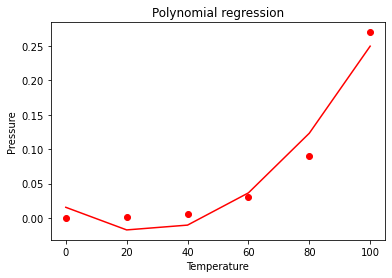

In [86]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='red')
plt.title('Polynomial regression')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()

In [88]:
print("coeffcient :",m.coef_)
print("Intercept :",m.intercept_)
print("MAE :",metrics.mean_absolute_error(y,y_pred))
print("MSE :",metrics.mean_squared_error(y,y_pred))
print("R2-score :",metrics.r2_score(y,y_pred))


coeffcient : [10.02148826  7.97914549  9.58089243  0.        ]
Intercept : 64.89891153798644
MAE : 0.018360000000000192
MSE : 0.0004000103333333331
R2-score : 0.9568461098911795


In [114]:
df = pd.read_csv('car_data.csv')
df

,Horsepower,Weight,MPG
0,130,3504,18
1,165,3693,15
2,150,3436,18
3,140,3433,16
4,198,4341,14
5,220,4354,12
6,95,2372,25
7,88,2130,27
8,98,2228,24


In [115]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]
x,y

(   Horsepower  Weight
 0         130    3504
 1         165    3693
 2         150    3436
 3         140    3433
 4         198    4341
 5         220    4354
 6          95    2372
 7          88    2130
 8          98    2228,
 0    18
 1    15
 2    18
 3    16
 4    14
 5    12
 6    25
 7    27
 8    24
 Name: MPG, dtype: int64)

In [116]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_poly,x

(array([[1.0000000e+00, 1.3000000e+02, 3.5040000e+03, 1.6900000e+04,
         4.5552000e+05, 1.2278016e+07],
        [1.0000000e+00, 1.6500000e+02, 3.6930000e+03, 2.7225000e+04,
         6.0934500e+05, 1.3638249e+07],
        [1.0000000e+00, 1.5000000e+02, 3.4360000e+03, 2.2500000e+04,
         5.1540000e+05, 1.1806096e+07],
        [1.0000000e+00, 1.4000000e+02, 3.4330000e+03, 1.9600000e+04,
         4.8062000e+05, 1.1785489e+07],
        [1.0000000e+00, 1.9800000e+02, 4.3410000e+03, 3.9204000e+04,
         8.5951800e+05, 1.8844281e+07],
        [1.0000000e+00, 2.2000000e+02, 4.3540000e+03, 4.8400000e+04,
         9.5788000e+05, 1.8957316e+07],
        [1.0000000e+00, 9.5000000e+01, 2.3720000e+03, 9.0250000e+03,
         2.2534000e+05, 5.6263840e+06],
        [1.0000000e+00, 8.8000000e+01, 2.1300000e+03, 7.7440000e+03,
         1.8744000e+05, 4.5369000e+06],
        [1.0000000e+00, 9.8000000e+01, 2.2280000e+03, 9.6040000e+03,
         2.1834400e+05, 4.9639840e+06]]),
    Horsepower  W

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=42)
m=LinearRegression()
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
print(y_pred)

[26.13943725 15.58820187]


In [118]:
print("coeffcient :",m.coef_)
print("Intercept :",m.intercept_)

print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("R2-score :",metrics.r2_score(y_test,y_pred))

coeffcient : [ 0.00000000e+00 -3.79301665e-01  2.05466640e-03 -1.82197568e-03
  2.43740952e-04 -5.70223919e-06]
Intercept : 49.434608907432875
MAE : 0.7243823138060677
MSE : 0.5432748488370809
R2-score : 0.9849090319767477


In [119]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [130]:
df.drop(columns = 'name',index=1, inplace=True)

In [131]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,2007,140000,125000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [133]:
df = pd.get_dummies(data=df,drop_first=True)
df

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,0,1,0,0
5,2007,140000,125000,0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,0,1,0,1,0,1,0,0
4336,2014,409999,80000,1,0,0,0,1,0,1,0,1,0,0
4337,2009,110000,83000,0,0,0,1,1,0,1,0,1,0,0
4338,2016,865000,90000,1,0,0,0,1,0,1,0,0,0,0


In [134]:
df['age'] = 2025 - df['year']

In [135]:
df

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,age
0,2007,60000,70000,0,0,0,1,1,0,1,0,0,0,0,18
2,2012,600000,100000,1,0,0,0,1,0,1,0,0,0,0,13
3,2017,250000,46000,0,0,0,1,1,0,1,0,0,0,0,8
4,2014,450000,141000,1,0,0,0,1,0,1,0,1,0,0,11
5,2007,140000,125000,0,0,0,1,1,0,1,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,0,1,0,1,0,1,0,0,11
4336,2014,409999,80000,1,0,0,0,1,0,1,0,1,0,0,11
4337,2009,110000,83000,0,0,0,1,1,0,1,0,1,0,0,16
4338,2016,865000,90000,1,0,0,0,1,0,1,0,0,0,0,9
